#### https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [1]:
import numpy as np 
import pandas as pd
import sklearn
from sklearn import metrics ,preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold , StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('online-payments-fraud-detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
print(data.shape)
print(data.dtypes)
print(data.describe())

(6362620, 11)
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
cou

In [4]:
print(data.isnull().sum())
print((data.duplicated()==True).sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
0


In [5]:
print(data.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='amount'>

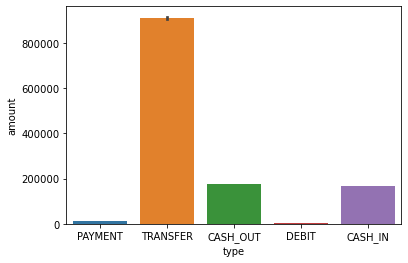

In [6]:
sns.barplot(x='type',y='amount',data=data)

In [7]:
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [8]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
type_new = pd.get_dummies(data['type'],drop_first=True)
data = pd.concat([data,type_new],axis=1)

In [10]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [11]:
X = data[['step','CASH_OUT','DEBIT','PAYMENT','TRANSFER','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = data['isFraud']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270653
           1       0.41      0.36      0.38      1871

    accuracy                           1.00   1272524
   macro avg       0.71      0.68      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



In [14]:
for degree in range(1,3 ):
#     scores_cv = []
    print(f'Polynomial of degree {degree}:')
#     print("..............................")
#     for cv in range(5,11):
    model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LogisticRegression()) 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(f"accuracy: {metrics.accuracy_score(y_train,y_pred_train)}")
    print(f'precision: {metrics.precision_score(y_train,y_pred_train)}')
    print(f'recall: {metrics.recall_score(y_train,y_pred_train)}')
    print("....................................................")
    print(f'accuracy: {metrics.accuracy_score(y_test,y_pred)}')
    print(f'precision: {metrics.precision_score(y_test,y_pred)}')
    print(f'recall: {metrics.recall_score(y_test,y_pred)}')

Polynomial of degree 1:
accuracy: 0.9982788143877837
precision: 0.36198115609880316
recall: 0.4312149249203701
....................................................
accuracy: 0.9983128019589415
precision: 0.35916622127204706
recall: 0.4148148148148148
Polynomial of degree 2:
accuracy: 0.9987047395569749
precision: 0.0
recall: 0.0
....................................................
accuracy: 0.9987269395311994
precision: 0.0
recall: 0.0


In [15]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.9987269395311994
0.0
0.0


In [20]:
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=5)
kf.get_n_splits(X)
split = 1
for train_index, test_index in kf.split(X,y):
    print(f'split: {split}')
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LogisticRegression(random_state=0)) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'accuracy: {metrics.accuracy_score(y_test,y_pred)}')
    print(f'precision: {metrics.precision_score(y_test,y_pred)}')
    print(f'recall: {metrics.recall_score(y_test,y_pred)}')
    split+=1

split: 1
accuracy: 0.9987898067148439
precision: 0.0
recall: 0.0
split: 2
accuracy: 0.9994043334349686
precision: 0.0
recall: 0.0
split: 3
accuracy: 0.9992998167421597
precision: 0.0
recall: 0.0
split: 4
accuracy: 0.999394903357422
precision: 0.0
recall: 0.0
split: 5
accuracy: 0.9966570375097051
precision: 0.0
recall: 0.0


In [21]:
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=5)
kf.get_n_splits(X)
split = 1
for train_index, test_index in kf.split(X,y):
    print(f'split: {split}')
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LogisticRegression(random_state=0)) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'accuracy: {metrics.accuracy_score(y_test,y_pred)}')
    print(f'precision: {metrics.precision_score(y_test,y_pred)}')
    print(f'recall: {metrics.recall_score(y_test,y_pred)}')
    split+=1

split: 1
accuracy: 0.9745804401331527
precision: 0.03484825607730636
recall: 0.7493506493506493
split: 2
accuracy: 0.9996675897664798
precision: 0.8130841121495327
recall: 0.5738786279683378
split: 3
accuracy: 0.9996062942624265
precision: 0.9733009708737864
recall: 0.4500561167227834
split: 4
accuracy: 0.9996235827379287
precision: 0.98989898989899
recall: 0.38181818181818183
split: 5
accuracy: 0.9973124278991987
precision: 1.0
recall: 0.19605077574047955


In [22]:
X = np.array(X)
y = np.array(y)
sss = StratifiedShuffleSplit(n_splits=5)
sss.get_n_splits(X)
split = 1
for train_index, test_index in sss.split(X,y):
    print(f'split: {split}')
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LogisticRegression(random_state=0)) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'accuracy: {metrics.accuracy_score(y_test,y_pred)}')
    print(f'precision: {metrics.precision_score(y_test,y_pred)}')
    print(f'recall: {metrics.recall_score(y_test,y_pred)}')
    split+=1

split: 1
accuracy: 0.9982664374110036
precision: 0.3603960396039604
recall: 0.44336175395858707
split: 2
accuracy: 0.9982161436640881
precision: 0.3448616600790514
recall: 0.42509135200974424
split: 3
accuracy: 0.998228717100817
precision: 0.3463855421686747
recall: 0.42021924482338613
split: 4
accuracy: 0.9982255737416348
precision: 0.3438133874239351
recall: 0.41291108404384896
split: 5
accuracy: 0.998356023147697
precision: 0.3804463336875664
recall: 0.43605359317904996
split: 6
accuracy: 0.9982947276436437
precision: 0.35927505330490406
recall: 0.4104750304506699
split: 7
accuracy: 0.998242862217137
precision: 0.34351949420442573
recall: 0.39707673568818513
split: 8
accuracy: 0.9983151594783282
precision: 0.3640303358613218
recall: 0.4092570036540804
split: 9
accuracy: 0.9982334321395903
precision: 0.3521951219512195
recall: 0.4397076735688185
split: 10
accuracy: 0.9982240020620436
precision: 0.3486777668952008
recall: 0.4336175395858709


In [23]:
X = np.array(X)
y = np.array(y)
sss = StratifiedShuffleSplit(n_splits=5)
sss.get_n_splits(X)
split = 1
for train_index, test_index in sss.split(X,y):
    print(f'split: {split}')
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), LogisticRegression(random_state=0)) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'accuracy: {metrics.accuracy_score(y_test,y_pred)}')
    print(f'precision: {metrics.precision_score(y_test,y_pred)}')
    print(f'recall: {metrics.recall_score(y_test,y_pred)}')
    split+=1

split: 1
accuracy: 0.9982978710028259
precision: 0.3671399594320487
recall: 0.440925700365408
split: 2
accuracy: 0.9982491489355014
precision: 0.3518705763397371
recall: 0.4238733252131547
split: 3
accuracy: 0.9983387346721948
precision: 0.378099173553719
recall: 0.4457978075517661
split: 4
accuracy: 0.9981847100722658
precision: 0.3378640776699029
recall: 0.4238733252131547
split: 5
accuracy: 0.9982931559640525
precision: 0.3600844772967265
recall: 0.415347137637028
split: 6
accuracy: 0.9982522922946836
precision: 0.3507692307692308
recall: 0.4165651644336175
split: 7
accuracy: 0.998299442682417
precision: 0.3619047619047619
recall: 0.4165651644336175
split: 8
accuracy: 0.9983010143620081
precision: 0.37103174603174605
recall: 0.45554202192448234
split: 9
accuracy: 0.9981799950334925
precision: 0.33031218529707956
recall: 0.3995127892813642
split: 10
accuracy: 0.9982821542069148
precision: 0.36427145708582837
recall: 0.4445797807551766


In [26]:
model = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), sklearn.linear_model.RidgeClassifier()) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)
print(f"accuracy: {metrics.accuracy_score(y_train,y_pred_train)}")
print(f'precision: {metrics.precision_score(y_train,y_pred_train)}')
print(f'recall: {metrics.recall_score(y_train,y_pred_train)}')
print("....................................................")
print(f'accuracy: {metrics.accuracy_score(y_test,y_pred)}')
print(f'precision: {metrics.precision_score(y_test,y_pred)}')
print(f'recall: {metrics.recall_score(y_test,y_pred)}')

[0.99881495 0.99884639 0.99888961 0.99883853 0.99888725]
accuracy: 0.9988538963159481
precision: 0.9987966305655837
recall: 0.11228354978354978
....................................................
accuracy: 0.9988636756556262
precision: 1.0
recall: 0.11936662606577345


In [ ]:
# model = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), sklearn.linear_model.LogisticRegressionCV(penalty='l2')) 
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# y_pred_train = model.predict(X_train)
# scores = cross_val_score(model, X_train, y_train, cv=5)
# print(scores)
# print(f"accuracy: {metrics.accuracy_score(y_train,y_pred_train)}")
# print(f'precision: {metrics.precision_score(y_train,y_pred_train)}')
# print(f'recall: {metrics.recall_score(y_train,y_pred_train)}')
# print("....................................................")
# print(f'accuracy: {metrics.accuracy_score(y_test,y_pred)}')
# print(f'precision: {metrics.precision_score(y_test,y_pred)}')
# print(f'recall: {metrics.recall_score(y_test,y_pred)}')